## Data Science and Business Analytics Task 2 : Clustering

### Objective: Predict the optimum no. of clusters: Iris dataset

### Prepared by: Syed Rizwan

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 

### Import the dataset

In [2]:
iris_data = pd.read_csv("E:\Rizwan\DSBA\The Sparks Foundation\Clustering\Iris.csv")

### Understand the dataset

In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.shape

(150, 6)

In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris_data.describe(include = 'all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


##### 1.) There are total 150 rows and 6 columns, of which Id column is not useful and we will drop that column later.
##### 2.) There are no null values in the dataset.

### Exploratory data analysis

In [7]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
dups = iris_data.duplicated()

print('No. of duplicates rows = %d' % (dups.sum()))

iris_data[dups]

No. of duplicates rows = 0


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [9]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

##### There are no duplicate rows and count of all the 3 species are same.

### Univariate Analysis

#### Histogram

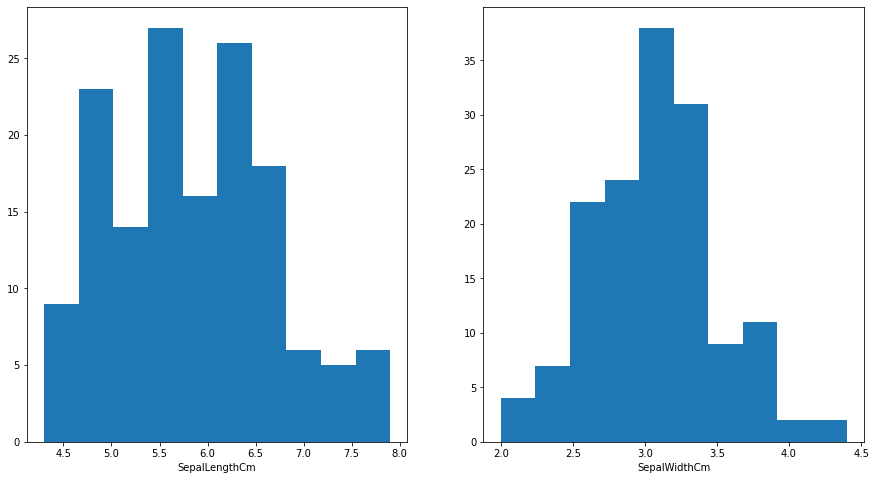

In [10]:
## EDA
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.hist(x = 'SepalLengthCm', data = iris_data)
plt.xlabel('SepalLengthCm')

plt.subplot(1,2,2)
plt.hist(x = 'SepalWidthCm', data = iris_data)
plt.xlabel('SepalWidthCm')
plt.show()

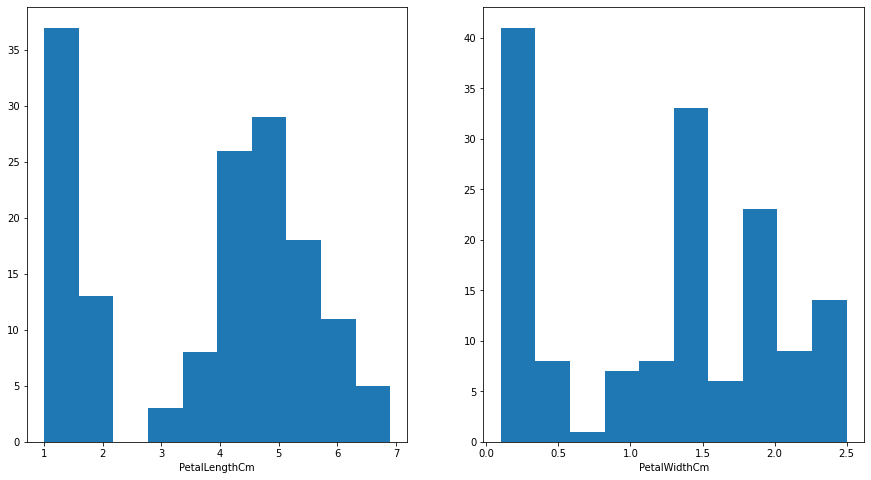

In [11]:
## EDA
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.hist(x = 'PetalLengthCm', data = iris_data)
plt.xlabel('PetalLengthCm')

plt.subplot(1,2,2)
plt.hist(x = 'PetalWidthCm', data = iris_data)
plt.xlabel('PetalWidthCm')
plt.show()

#### Boxplot

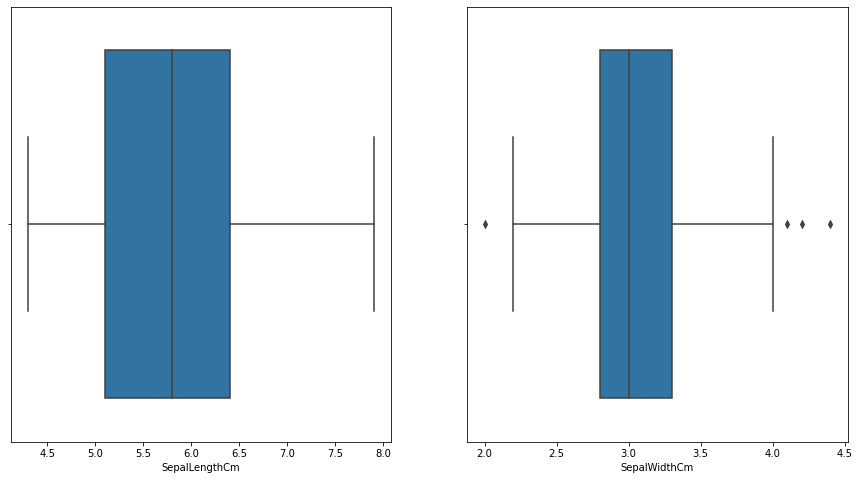

In [12]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.boxplot(x = 'SepalLengthCm', data = iris_data)
plt.xlabel('SepalLengthCm')

plt.subplot(1,2,2)
sns.boxplot(x = 'SepalWidthCm', data = iris_data)
plt.xlabel('SepalWidthCm')
plt.show()

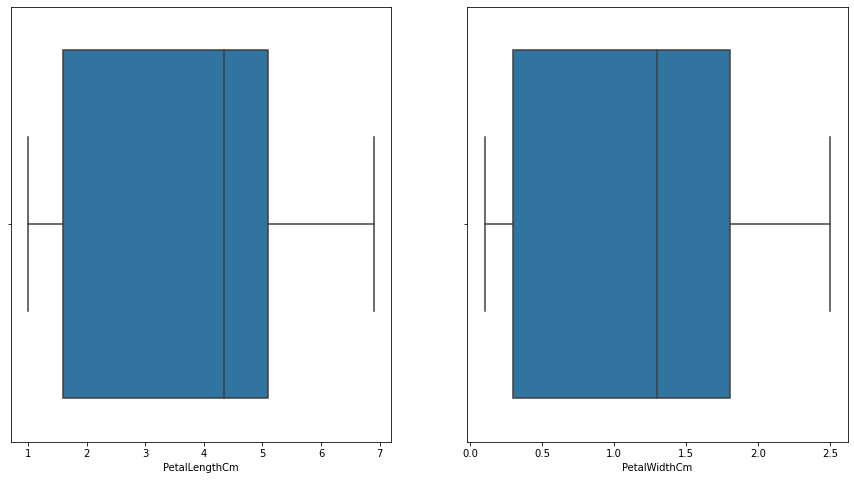

In [13]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.boxplot(x = 'PetalLengthCm', data = iris_data)
plt.xlabel('PetalLengthCm')

plt.subplot(1,2,2)
sns.boxplot(x = 'PetalWidthCm', data = iris_data)
plt.xlabel('PetalWidthCm')
plt.show()

In [14]:
import scipy.stats as stats

Skewness = pd.DataFrame({'Skewness' : [stats.skew(iris_data['SepalLengthCm']), stats.skew(iris_data['SepalWidthCm']), stats.skew(iris_data['PetalLengthCm']), stats.skew(iris_data['PetalWidthCm'])]},
                        index=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])  # Measure the skeweness of the required columns
Skewness

,Skewness
SepalLengthCm,0.311753
SepalWidthCm,0.330703
PetalLengthCm,-0.271712
PetalWidthCm,-0.103944


##### From the box plot we can see that, sepal width have few outliers in them. Sepal length and sepal width are positive skewed whereas petal length and petal width are negative skewed.

#### Count plot

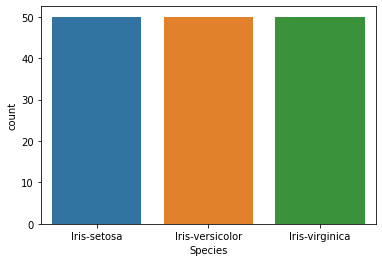

In [15]:
sns.countplot(x = 'Species', data = iris_data) 
plt.xlabel('Species')
plt.show()

### Bivariate Analysis

#### Bar plot

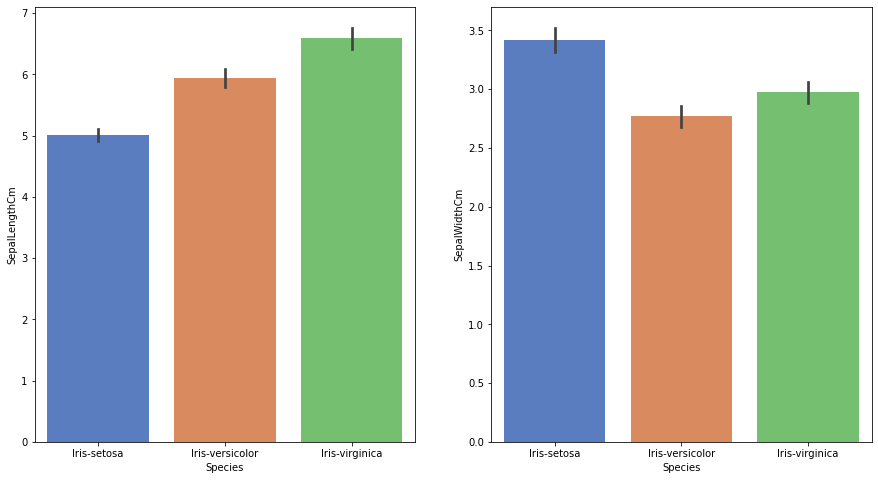

In [16]:
plt.figure(figsize=(15,8))  # setting the figure size
plt.subplot(1,2,1)
sns.barplot(x='Species', y='SepalLengthCm', data=iris_data, palette='muted')  # barplot

plt.subplot(1,2,2)
sns.barplot(x='Species', y='SepalWidthCm', data=iris_data, palette='muted') 
plt.show()

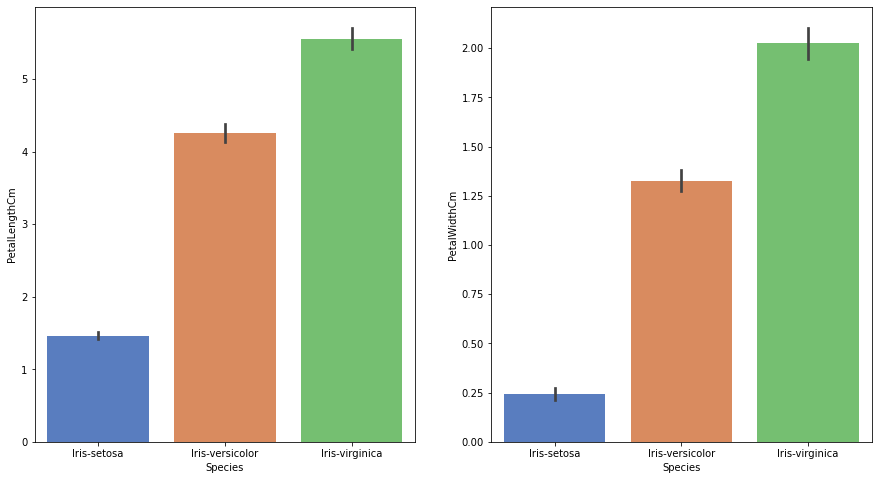

In [17]:
plt.figure(figsize=(15,8))  # setting the figure size
plt.subplot(1,2,1)
sns.barplot(x='Species', y='PetalLengthCm', data=iris_data, palette='muted')  # barplot

plt.subplot(1,2,2)
sns.barplot(x='Species', y='PetalWidthCm', data=iris_data, palette='muted') 
plt.show()

##### From the bar plot we can see that, for Iris-virginica sepal length, petal length and petal width are highest, whereas sepal width is highest for Iris-setaosa.

#### Dropping the Id column as it is not useful for analysis

In [18]:
iris_data = iris_data.drop('Id', axis = 1)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Multivariate Analysis

#### Pair plot

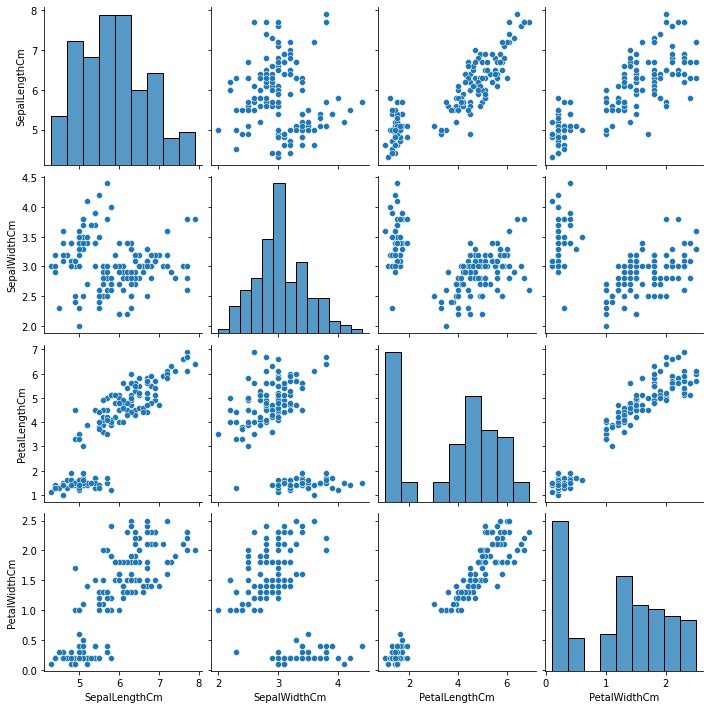

In [19]:
sns.pairplot(iris_data)

#### Heatmap

<AxesSubplot:>

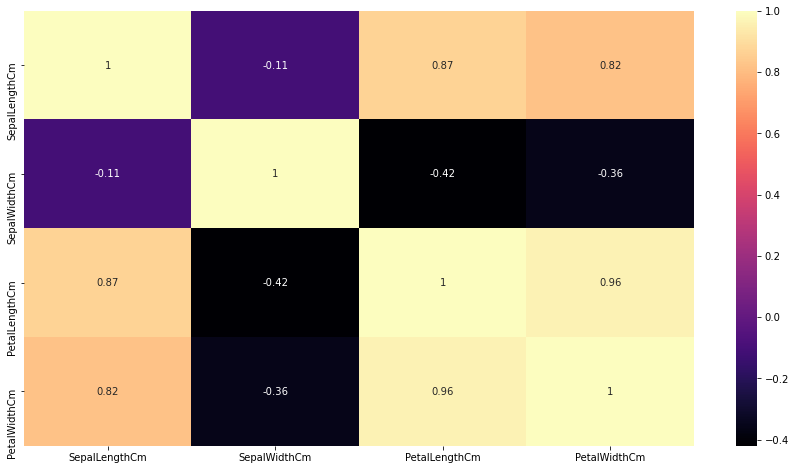

In [20]:
plt.figure(figsize = (15,8))
sns.heatmap(iris_data.corr(), annot = True, cmap = 'magma')

##### From the heatmap, we can see that there is strong positive correlation between petal length-petal width, petal width-sepal length and petal length-petal width.

##### There is strong negative correlation between petal length-sepal width and petal width-sepal width.

### Importing the Standard Scaler function for scaling the dataset

#### For K means clustering, scaling is required.

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
X = StandardScaler()
scaled_iris = X.fit_transform(iris_data.iloc[:,0:4])

In [23]:
scaled_iris

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

### Creating Clusters using KMeans

In [24]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2, random_state = 1)

In [25]:
k_means.fit(scaled_iris)

KMeans(n_clusters=2, random_state=1)

In [26]:
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### Within Cluster Sum of Squares (WSS) for K=2

In [27]:
k_means.inertia_

223.73200573676343

### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [28]:
k_means_1 = KMeans(n_clusters = 1,random_state=1)
k_means_1.fit(scaled_iris)
k_means_1.inertia_

600.0000000000003

In [29]:
k_means_3 = KMeans(n_clusters = 3,random_state=1)
k_means_3.fit(scaled_iris)
k_means_3.inertia_

140.96837895511072

In [30]:
k_means_4 = KMeans(n_clusters = 4,random_state=1)
k_means_4.fit(scaled_iris)
k_means_4.inertia_

114.61353859563565

In [31]:
k_means_5 = KMeans(n_clusters = 5,random_state=1)
k_means_5.fit(scaled_iris)
k_means_5.inertia_

91.07563926881433

### Calculating WSS for other values of K - Elbow Method

In [32]:
wss =[] 

for i in range(1,8):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_iris)
    wss.append(KM.inertia_)
    
wss

[600.0000000000003,
 223.73200573676343,
 140.96837895511072,
 114.61353859563565,
 91.07563926881433,
 80.23060704506956,
 72.45691763699084]

Text(0, 0.5, 'WCSS')

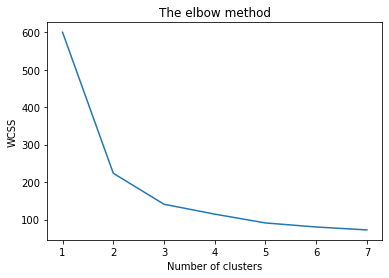

In [45]:
plt.plot(range(1,8), wss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares

#### Labels for KMeans with K=3

In [34]:
k_means_3 = KMeans(n_clusters = 3, random_state = 1)
k_means_3.fit(scaled_iris)
labels_3 = k_means_3.labels_
labels_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

### Importing the library to calculate the silhoutte score

In [35]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [36]:
# Calculating silhouette_score for  K =3
silhouette_score(scaled_iris, labels_3, random_state = 1)

0.45840087099074767

#### Lables for KMeans with K = 4

In [37]:
k_means_4 = KMeans(n_clusters = 4, random_state = 1)
k_means_4.fit(scaled_iris)
labels_4 = k_means_4.labels_

In [38]:
# Calculating silhouette_score for K=4
silhouette_score(scaled_iris, labels_4, random_state = 1)

0.3891153183966356

##### Since, silhouette score for k=3 is greater than k=4, thus optimum no. of clusters are 3.

#### Adding new column which shows the respective clusters formed

In [39]:
iris_data["Clus_kmeans3"] = labels_3
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clus_kmeans3
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


#### Optimum no. of clusters are 3 ie. 0,1,2 where 0 represents Iris-setosa, 1 represents Iris-versicolour, 2 represents Iris-virginica

In [40]:
clust_profile=iris_data
clust_profile=clust_profile.groupby('Clus_kmeans3').mean()
clust_profile['freq']=iris_data.Clus_kmeans3.value_counts().sort_index()
clust_profile

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,freq
Clus_kmeans3,,,,,
0,5.006000,3.418000,1.464000,0.244000,50
1,5.786538,2.669231,4.365385,1.415385,52
2,6.777083,3.091667,5.491667,1.958333,48


In [42]:
x = iris_data.iloc[:, [0, 1, 2, 3]].values

# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans_3 = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans_3 = kmeans_3.fit_predict(x)

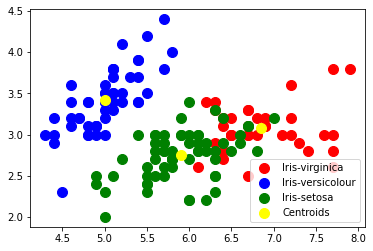

In [44]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans_3 == 0, 0], x[y_kmeans_3 == 0, 1], 
            s = 100, c = 'red', label = 'Iris-virginica')
plt.scatter(x[y_kmeans_3 == 1, 0], x[y_kmeans_3 == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans_3 == 2, 0], x[y_kmeans_3 == 2, 1],
            s = 100, c = 'green', label = 'Iris-setosa')

# Plotting the centroids of the clusters
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

##### 1.) First cluster have smallest mean petal width and mean petal length, mean sepal length is least for this cluster but mean sepal width
#####      is highest among others.

##### 2.) Second cluster have medium mean petal width and petal length, mean sepal length is greater than first cluster but mean sepal width
#####      is less than first cluster.

##### 3.) Third cluster have lagest mean petal width and petal length, mean sepal length is also largest among other two clusters, mean sepal 
#####       width is smaller than first cluster but larger than second.

## Thank you